In [1]:
import numpy as np
import scipy
from sklearn.datasets import load_diabetes, load_breast_cancer

diabetes = load_diabetes()

breast_cancer = load_breast_cancer()

X = breast_cancer.data
Y = breast_cancer.target[:, np.newaxis]

print(X.shape)
print(Y.shape)



# use the fourth feature
# use the first 300 training samples for training, and the rest for testing
X_train = breast_cancer.data[:300, np.newaxis, 3]
y_train = breast_cancer.target[:300, np.newaxis]
X_test = breast_cancer.data[300:, np.newaxis, 3]
y_test = breast_cancer.target[300:, np.newaxis]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

import sys
sys.path.append('code/')

# the actual implementation is in linear_regression.py,
# here we will just use it to fit a model
from linear_regression import *

# load the dataset
# same as before, but now we use all features
X_train = breast_cancer.data[:300, :]
y_train = breast_cancer.target[:300, np.newaxis]
X_test = breast_cancer.data[300:, :]
y_test = breast_cancer.target[300:, np.newaxis]

(569, 30)
(569, 1)
(300, 1)
(300, 1)
(269, 1)
(269, 1)


In [31]:
def normalize(X):
    x1_min = min(X_train[:,0])
    x1_max = max(X_train[:,0])
    
    f = lambda x: (x - x1_min)/(x1_max-x1_min)
    X[:,0] = f(X[:,0])
    
    x2_min = min(X_train[:,1])
    x2_max = max(X_train[:,1])
    
    f = lambda x: (x - x2_min)/(x2_max-x2_min)
    X[:,1] = f(X[:,1])
    
    return X


In [34]:
X_train = normalize(X_train)
#y_train = normalize(y_train)

X_test = normalize(X_test)
#y_test = normalize(y_test)

In [35]:
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)


In [36]:
def get_neighbours(train, test_row, k):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbours = list()
    for i in range(k):
        neighbours.append(distances[i][0])
    return neighbours

In [37]:
def predict_classification(train, test_row, k):
    neighbours = get_neighbours(train, test_row, k)
    output_values = [row[-1] for row in neighbours]
    prediction = max(set(outputvalues_, key=output_values.count))
    return prediction

In [39]:
#prediction = predict_classification(X_train, X_test, 3)
#print(prediction)

In [61]:
def knn_regressor(X_train, y_train, X_test, k):
    D = scipy.spatial.distance.cdist(X_test, X_train, metric ='euclidean')
    sort_ix =  np.argsort(D, axis=1)
    sort_ix_k = sort_ix[:,:k]
    predicted_values = y_train[sort_ix_k]
    #predicted_values = scipy.stats.mode(predicted_values, axis=1)[0]
    #vals_neigh = predicted_values.sum()
    
    for i in range(len(predicted_values)):
        predicted_value = np.sum(predicted_values[i])
        predicted_value = predicted_value/k
        
    
    return predicted_value

knn_regressor(X_train, y_train, X_test, 3)

1.0

In [12]:
def kNearestNeighbour_regressor(k, testData, trainingData, trainingLabels):
    """k Nearest neighbour algorithm for classification of data.
    
    :param k: nr of neighbours to be considered.
    :param testData: array of datapoints to be labelled.
    :param trainingData: reference datapoints with known labels.
    :param trainingLabels: array of labels that belong to the trainingData.
    :returns: array of labels for testData.
    """
    newLabels = []
    for newPoint in testData:
        dist = np.linalg.norm(trainingData - newPoint, axis=1)    # Caulculate Euclidean distance per new point 
        nearestNeighbours = np.argsort(dist)[:k]            # Find nearest neighbours per point 
        nearestLabels = np.array(trainingLabels[nearestNeighbours])
        newLabels.append([nearestLabels.mean()])
    newLabels = np.array(newLabels)
        
    return predictedLabels

In [13]:
predictedLabels = kNearestNeighbour(5, X_test, X_train, y_train)

In [26]:
def evalkNNRegressor(k, testData, testLabels, trainingData, trainingLabels):
    predictedLabels = kNearestNeighbour(k, testData, trainingData, trainingLabels)
    totalError = 0
    for i in range(len(predictedLabels)):
        totalError += abs(predictedLabels[i] - testLabels[i])
    return totalError

evalkNNRegressor(5, X_test, y_test, X_train, y_train)
#print(evalkNNRegressor(predictedLabels, y_test)        


array([32.43333333])

In [32]:


scores = []

for i in range(1, 31):
    scores.append(evalkNNRegressor(i, X_test, y_test, X_train, y_train))
    
print(scores)

30


Text(0, 0.5, 'total error found')

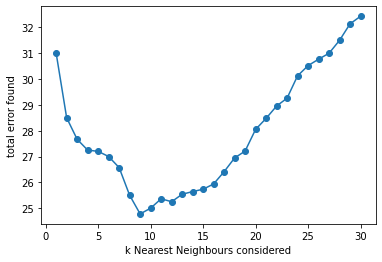

In [41]:
import matplotlib.pyplot as plt

x_axis = range(1,31)
y_axis = scores

plt.plot(x_axis, y_axis, marker='o')
plt.xlabel('k Nearest Neighbours considered')
plt.ylabel('total error found')